# Crime Rate In Maryland

# By Yujie Wang, Ziran Zhao, Nan Ke

# CMSC 320 Final Tutorial 

# Overview
## 1. Background
    1.1	Introduction
    1.2 Definition
    1.3 Libraries
## 2. Data Collection
    2.1 Data Scraping
    2.2 Data Display
    2.3 Data Analysis
## 3. Data Analysis
    3.1 Crime Rate Overview
    3.2 Statical Summary of Regression
    3.3 In-depth Analysis of Violent and Property Crime
    3.4 Crime Distribution in Every County

# 1. Backround

# 1.1 Introduction 
Have you ever wondered is it safe to live in Maryland? Once we first came to University of Maryland, our senior friends told us some hidden safety rule for living here. First, never walk alone by yourself at night. Secondly, never leave your backpack inside your car. Last but not least, bring a twenty-dollar bill if you have to walk alone. If someone “ask for” the money, it is the best protection we can have. Thus, our group choose to look into data about violence crime and property crime in Maryland to have a deeper understanding about safety in Maryland. We collect our data from opendata.maryland.gov.

# 1.2 Defintion
Here are definitions of type of crimes which are taken from FBI.  (https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/topic-pages/violent-crime)

•	Violent crime: violent crime is composed of four offenses: murder and nonnegligent manslaughter, rape, robbery, and aggravated assault. Violent crimes are defined in the UCR Program as those offenses that involve force or threat of force.

•	Property crime: property crime includes the offenses of burglary, larceny-theft, motor vehicle theft, and arson. In a property crime, a victim’s property is stolen or destroyed, without the use or threat of force against the victim 

•	Murder: The FBI’s Uniform Crime Reporting (UCR) Program defines murder and nonnegligent manslaughter as the willful (nonnegligent) killing of one human being by another. The classification of this offense is based solely on police investigation as opposed to the determination of a court, medical examiner, coroner, jury, or other judicial body.

•	Rape: The FBI defines that penetration no matter how slight, of the vagina or anus with any body part or object, or oral penetration by a sex organ of another person, without the consent of the victim. Attempts or assaults to commit rape are also included in the statistics presented here. 

•	Robbery: The FBI defines robbery as the taking or attempting to take anything of value from the care, custody, or control of a person or persons by force or threat of force or violence and/or by putting the victim in fear.

•	Aggravated Assault (AGG. Assault): The FBI defines aggravated assault as an unlawful attack by one person upon another for the purpose of inflicting severe or aggravated bodily injury. 

•	Burglary (B&E): The FBI defines burglary as the unlawful entry of a structure to commit a felony or theft. 

•	Larceny theft: The FBI defines larceny-theft as the unlawful taking, carrying, leading, or riding away of property from the possession or constructive possession of another. 

•	Motor vehicle theft (M/V): Motor vehicle theft is defined as the theft or attempted theft of a motor vehicle. A motor vehicle is defined in the UCR Program as a self-propelled vehicle that runs on land surfaces and not on rails.




Burglary (B&E): The FBI defines burglary as the unlawful entry of a structure to commit a felony or theft. 

Larceny theft: The FBI defines larceny-theft as the unlawful taking, carrying, leading, or riding away of property from the possession or constructive possession of another. 

Motor vehicle theft (M/V): Motor vehicle theft is defined as the theft or attempted theft of a motor vehicle. A motor vehicle is defined in the UCR Program as a self-propelled vehicle that runs on land surfaces and not on rails.


# 1.3 Libraries

The following python libraries used are listed below

    Numpy
    Seaborn
    Pandas
    Datetime
    Folium  
    Matplolib
    Statsmodels
    Datetime
    Sklearn


In [118]:

# 1. install required packages
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dtm
import folium
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from datetime import datetime
from sklearn import linear_model as lm
from statsmodels.formula.api import ols

# 2. Data Collection

Public safety is an important issue that we need to consider. To measure how safety it is in Maryland, it is significant to know the trends of different crimes rates in Maryland. Our group wants to identify the relationship in different crimes in order to better show any safety issue that we need to focus upon more. On data science level, we want to use the existing data to create the model for different crimes, so that it can be used to give a prediction for future references. 


## 2.1 Data Scraping

### Overall Description

Our analysis will base on the number of crime in each county during 1975-2019. We will analyze the relationship between number of crime and the changing of each year. Basically there are two types of crime, which are violent crime and property crime. In this part we will collect the data and put them into our program, and we subdivided each crime event into different categories and recorded the proportion of each crime type in 100,000 people.

In [119]:
data_county = pd.read_csv("Violent_Crime___Property_Crime_by_County__1975_to_Present.csv", sep=',')
data_state = pd.read_csv("Violent_Crime___Property_Crime_Statewide_Totals__1975_to_Present.csv", sep=',')

rate_rename = ['Jurisdiction', 'Year', 'Overall', 'Violent', 
               'Property', 'Murder', 'Rape', 'Robbery', 
               'Agg_Assault', 'B_&_E', 'Larceny', 'MV_Theft']
rate_columns = ['JURISDICTION',
                'YEAR', 
                'OVERALL CRIME RATE PER 100,000 PEOPLE', 
                'VIOLENT CRIME RATE PER 100,000 PEOPLE',
                'PROPERTY CRIME RATE PER 100,000 PEOPLE',
                'MURDER PER 100,000 PEOPLE',
                'RAPE PER 100,000 PEOPLE',
                'ROBBERY PER 100,000 PEOPLE',
                'AGG. ASSAULT PER 100,000 PEOPLE',
                'B & E PER 100,000 PEOPLE',
                'LARCENY THEFT PER 100,000 PEOPLE',
                'M/V THEFT PER 100,000 PEOPLE']


## 2.2 Data Display

### Data Description: Crime in Maryland

In [120]:
rate_MD_df = data_state.filter(rate_columns, axis=1)
rate_MD_df.columns = rate_rename

rate_MD_df.head()


,Jurisdiction,Year,Overall,Violent,Property,Murder,Rape,Robbery,Agg_Assault,B_&_E,Larceny,MV_Theft
0,Maryland,1975,5910.4,709.6,5200.8,10.6,31.4,344.2,323.4,1413.8,3269.9,517.1
1,Maryland,1976,5663.8,633.4,5030.4,8.5,32.0,295.5,297.3,1359.8,3241.7,428.9
2,Maryland,1977,5699.5,693.8,5005.7,8.0,34.8,292.1,358.9,1399.8,3177.5,428.4
3,Maryland,1978,5813.2,732.0,5081.1,8.2,35.6,309.6,378.6,1421.7,3234.7,424.8
4,Maryland,1979,6297.1,798.2,5499.0,9.8,39.2,331.3,417.9,1510.2,3501.5,487.3


### Data Description: Crime in Each County in Maryland

In [121]:
rate_County_df = data_county.filter(rate_columns, axis=1)
rate_County_df.columns = rate_rename

rate_County_df.head()

,Jurisdiction,Year,Overall,Violent,Property,Murder,Rape,Robbery,Agg_Assault,B_&_E,Larceny,MV_Theft
0,Allegany County,1975,2923.9,178.3,2745.6,3.8,6.3,25.1,143.1,839.9,1789.0,116.8
1,Allegany County,1976,2532.1,103.7,2428.4,2.4,2.4,28.6,70.3,692.3,1649.1,87.0
2,Allegany County,1977,2693.0,154.7,2538.3,3.7,8.5,39.0,103.5,721.1,1693.0,124.2
3,Allegany County,1978,2664.9,127.6,2537.3,1.3,2.5,22.5,101.3,674.0,1738.2,125.1
4,Allegany County,1979,2912.7,138.0,2774.7,1.3,8.8,22.6,105.4,629.7,2020.8,124.2


# 3. Data Analysis

## 3.1 Crime Rate Overview

This part we will analyze the two main parts of crime rate changing over time (1975-2019). We present the relationship by creating dot plot and line chart below.

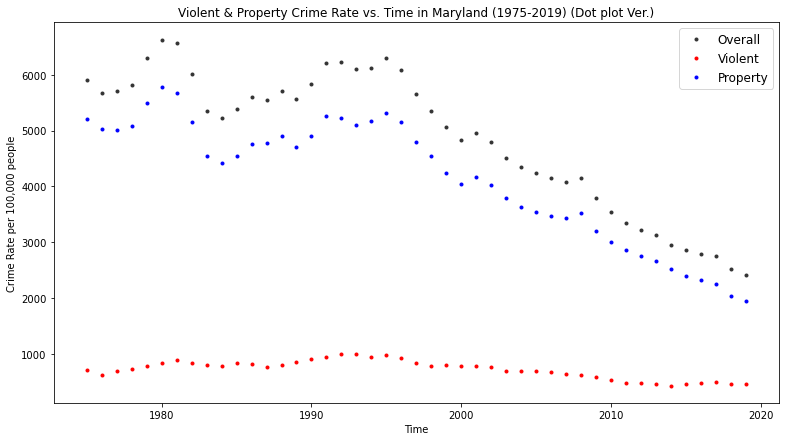

In [122]:
plt.figure(figsize=(13, 7))
plt.title('Violent & Property Crime Rate vs. Time in Maryland (1975-2019) (Dot plot Ver.)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Overall, '.', label='Overall', lw=2, c='#333333')
plt.plot(rate_MD_df.Year, rate_MD_df.Violent, '.', label='Violent', lw=2, c='r')
plt.plot(rate_MD_df.Year, rate_MD_df.Property, '.', label='Property', lw=2, c='b')

plt.legend(fontsize='large')
plt.show()

As we can see above, the trend of overall crime rate is dominated by property crime. Property crime dominates the total crime rate. However, violent crime is much less than property crime, and we can see that the fluctuation of total crime rate is closely related to the fluctuation of property crime rate from year to year. And it is found that from 1970 to 2019, property crime rate is decreasing and leads to the decrease of total crime rate. However, the violent crime rate is less volatile.

Overall, thanks to the decrease in property crime rate, making the crime rate in 2019 only 1/3 of the level compared to 1975.

The decline in the property crime rate is due to economic development, and there is a correlation between good and bad economic development and crime rates. In fact, from this graph as well as can prove that there is a certain relationship between crime rate and socio-economics. From the economic crisis in 2008, the property crime rate rose in that year and led to an increase in the total crime rate.

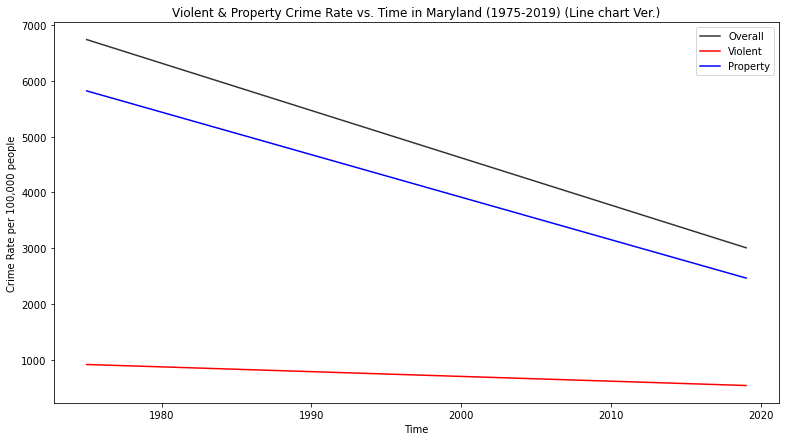

In [123]:
plt.figure(figsize=(13, 7))
plt.title('Violent & Property Crime Rate vs. Time in Maryland (1975-2019) (Line chart Ver.)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

reg = lm.LinearRegression()
rx = [[x] for x in rate_MD_df["Year"].values]
ry_all = [[y] for y in rate_MD_df["Overall"].values]
ry_vio = [[y] for y in rate_MD_df["Violent"].values]
ry_pro = [[y] for y in rate_MD_df["Property"].values]

regfit_all = reg.fit(rx, ry_all)
plt.plot(rx, regfit_all.predict(rx), c='#333333', label='Overall')

regfit_vio = reg.fit(rx, ry_vio)
plt.plot(rx, regfit_vio.predict(rx), c='r', label='Violent')

regfit_pro = reg.fit(rx, ry_pro)
plt.plot(rx, regfit_pro.predict(rx), c='b', label='Property')

plt.legend()
plt.show()

From this regression line chart we can also know that the main part of total crime rate is property crime rate.

## 3.2 Statistical Summary of Regression

In this part we will present the regression information of each part. We classified crimes into differnet categrories that our data given. First we shows the overall crime rate regression summary.

In [124]:
# Statistical Summary of Regression for the overall crime rate in Maryland
print(smf.ols(formula="Overall ~ Year", data=rate_MD_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     164.3
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           2.77e-16
Time:                        22:49:33   Log-Likelihood:                -348.86
No. Observations:                  45   AIC:                             701.7
Df Residuals:                      43   BIC:                             705.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.741e+05   1.32e+04     13.188      0.0

As we can see in our Overall-Year regression summary, the data is perfectly explained that our dependent variable 'Overall' can explian the independent variable 'Year'. R-squared value is very high which can prove that. Also, our p value is lower than 0.05, which means we can reject our null hypothesis. That proves with time goes by, the overall crime rate decrease.

In [125]:
# Statistical Summary of Regression for the violent crime rate in Maryland
print(ols(formula="Violent ~ Year", data=rate_MD_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Violent   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     36.52
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.16e-07
Time:                        22:49:33   Log-Likelihood:                -279.52
No. Observations:                  45   AIC:                             563.0
Df Residuals:                      43   BIC:                             566.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.782e+04   2828.322      6.302      0.0

As we can see in our Violent-Year regression summary, our R-squared value is not very high. That means our dependent variable 'Violent' cannot explain the independent variable 'Year'. The Violent crime rate will not decrease or increase if year goes by. The rate might be influenced by other reason.

In [126]:
# Statistical Summary of Regression for the property crime rate in Maryland
print(ols(formula="Property ~ Year", data=rate_MD_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               Property   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     204.4
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           6.10e-18
Time:                        22:49:33   Log-Likelihood:                -339.16
No. Observations:                  45   AIC:                             682.3
Df Residuals:                      43   BIC:                             685.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.563e+05   1.06e+04     14.684      0.0

As we can see in our Property-Year regression summary, the data is perfectly explained that our dependent variable 'Property' can explian the independent variable 'Year'. R-squared value is very high which can prove that. Also, our p value is lower than 0.05, which means we can reject our null hypothesis. That proves with time goes by, the Property crime rate decrease.

## 3.3 In-depth Analysis of Violent and Property Crime

There are many subcategories of crime in violent crime and property crime. We will analyze each subdivision in depth and find the relationship between them. We will include regression summary of each part.

### Violent Crime

There are 4 categories in violent crime, which are Murder, Rape, Robbery, and Aggrevated Assault. 

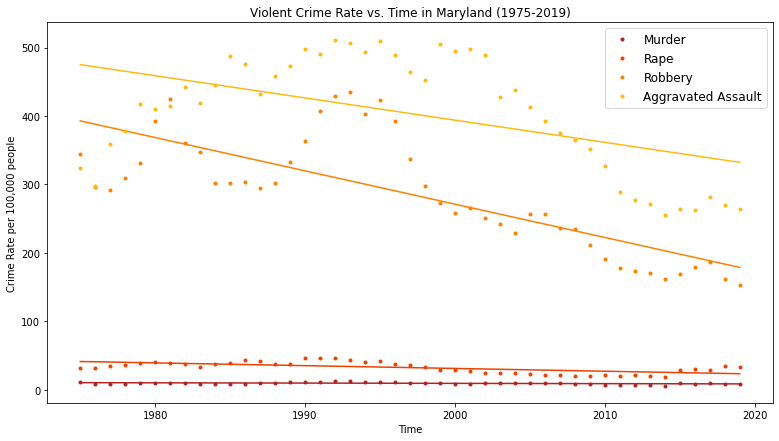

In [127]:
plt.figure(figsize=(13, 7))
plt.title('Violent Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

ry_mur = [[y] for y in rate_MD_df["Murder"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Murder, '.', label='Murder', lw=2, c='#B22222')
regfit_mur = reg.fit(rx, ry_mur)
plt.plot(rx, regfit_mur.predict(rx), c='#B22222')

ry_rap = [[y] for y in rate_MD_df["Rape"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Rape, '.', label='Rape', lw=2, c='#EE4000')
regfit_rap = reg.fit(rx, ry_rap)
plt.plot(rx, regfit_rap.predict(rx), c='#EE4000')

ry_rob = [[y] for y in rate_MD_df["Robbery"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Robbery, '.', label='Robbery', lw=2, c='#FF8000')
regfit_rob = reg.fit(rx, ry_rob)
plt.plot(rx, regfit_rob.predict(rx), c='#FF8000')

ry_agg = [[y] for y in rate_MD_df["Agg_Assault"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Agg_Assault, '.', label='Aggravated Assault', lw=2, c='#FFB90F')
regfit_agg = reg.fit(rx, ry_agg)
plt.plot(rx, regfit_agg.predict(rx), c='#FFB90F')

plt.legend(fontsize='large')
plt.show()

As we can see above, Aggravated Assault and Robbery are the two main parts of violent crime, since the rate of these part is much higher than Murder and Rape. As result, we will choose Robbery and Aggravated Assault as two factor that influencing on total crime rate overtime.

### Property Crime

There are three factors in property crime, which are Breaking or Entering, Larceny Theft, and Motor Vehicle Theft.

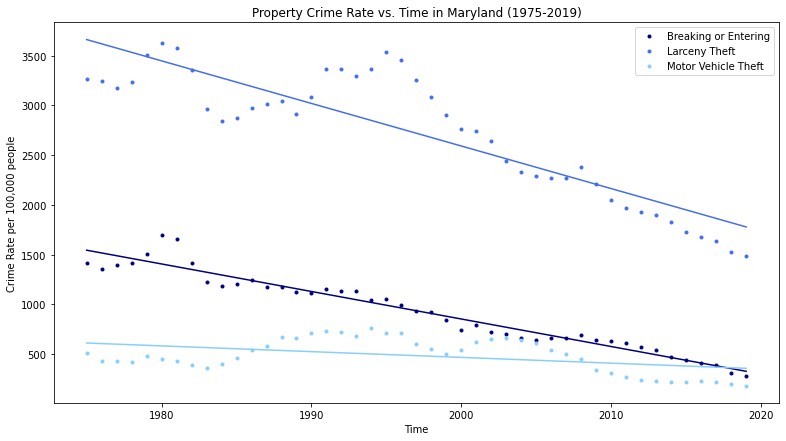

In [128]:
plt.figure(figsize=(13, 7))
plt.title('Property Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

ry_bne = [[y] for y in rate_MD_df['B_&_E'].values]
plt.plot(rate_MD_df.Year, rate_MD_df['B_&_E'], '.', label='Breaking or Entering', lw=2, c='#000080')
regfit_bne = reg.fit(rx, ry_bne)
plt.plot(rx, regfit_mur.predict(rx), c='#000080')

ry_lar = [[y] for y in rate_MD_df["Larceny"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Larceny, '.', label='Larceny Theft', lw=2, c='#436EEE')
regfit_lar = reg.fit(rx, ry_lar)
plt.plot(rx, regfit_lar.predict(rx), c='#436EEE')

ry_mvt = [[y] for y in rate_MD_df["MV_Theft"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.MV_Theft, '.', label='Motor Vehicle Theft', lw=2, c='#87CEFF')
regfit_mvt = reg.fit(rx, ry_mvt)
plt.plot(rx, regfit_mvt.predict(rx), c='#87CEFF')

plt.legend()
plt.show()

As we can see above, the chart shows that the rate of three factor from property crime. Breadking or Entering rate and Larceny Theft rate is much higher than the rate of Motor Vehicle Theft. However, we still going to analyze all of them. Despite of the rate of Motor Vehicle Theft is the lowest in property crime rate, but it still higher than the two factor from Violent crime rate that we choose, which are Robbery and Aggravated Assault.

Final five factors that we will choose to analysis: Robbery, Aggravated Assault, Breadking or Entering rate, Larceny Theft, and Motor Vehicle Theft.

### Robbery Rate Analysis

Comparing Overall crime rate, Violent crime rate, and robbery rate, and do the regression analysis.

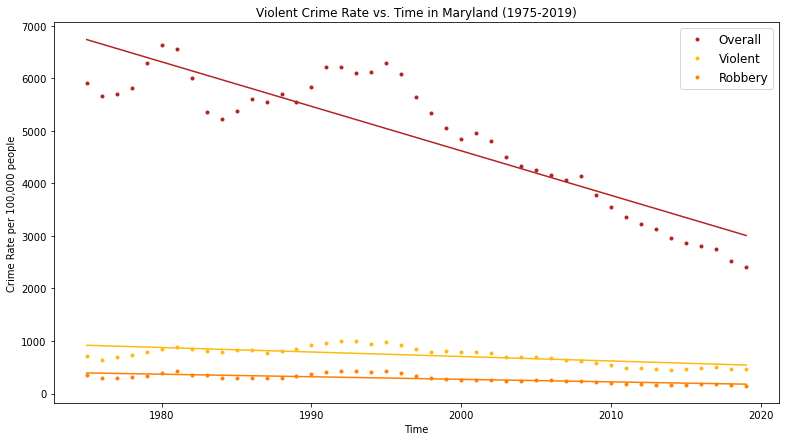

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     335.9
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           6.16e-22
Time:                        22:49:36   Log-Likelihood:                -213.73
No. Observations:                  45   AIC:                             431.5
Df Residuals:                      43   BIC:                             435.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2951     17.339     -1.286      0.2

In [129]:
plt.figure(figsize=(13, 7))
plt.title('Violent Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Overall, '.', label='Overall', lw=2, c='#B22222')
regfit_all = reg.fit(rx, ry_all)
plt.plot(rx, regfit_all.predict(rx), c='#B22222')

plt.plot(rate_MD_df.Year, rate_MD_df.Violent, '.', label='Violent', lw=2, c='#FFB90F')
regfit_vio = reg.fit(rx, ry_vio)
plt.plot(rx, regfit_vio.predict(rx), c='#FFB90F')

ry_rob = [[y] for y in rate_MD_df["Robbery"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Robbery, '.', label='Robbery', lw=2, c='#FF8000')
regfit_rob = reg.fit(rx, ry_rob)
plt.plot(rx, regfit_rob.predict(rx), c='#FF8000')

plt.legend(fontsize='large')
plt.show()

print(ols(formula="Robbery ~ Overall", data=rate_MD_df).fit().summary())

As we can see the linear regression chart above, although Robbery rate occupies the main part of Violent crime rate, it still stands very low perventage of Overall crime rate. In the OLS regression result, the r-squared is very high, which means that the 'Robbery' rate as a dependent variable has high relationship with independent variable 'Overall'.
In this situation, the relationship between both variable is positive.

### Aggravated Assault Analysis

Comparing Overall crime rate, Violent crime rate, and Aggravated Assault rate, and do the regression analysis.

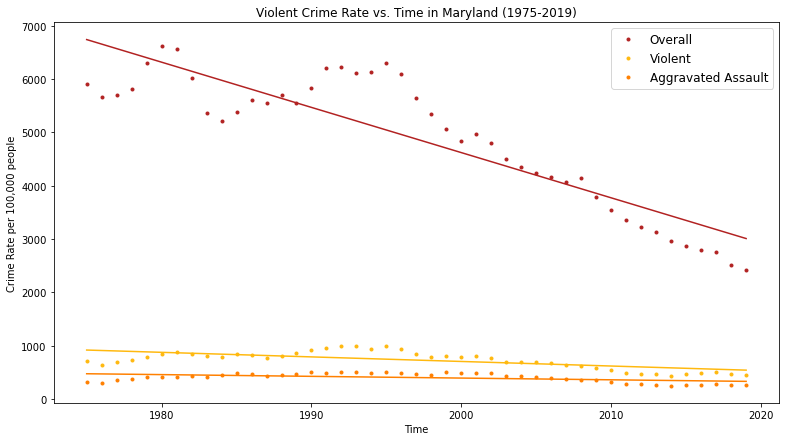

                            OLS Regression Results                            
Dep. Variable:            Agg_Assault   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     59.48
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.22e-09
Time:                        22:49:36   Log-Likelihood:                -244.18
No. Observations:                  45   AIC:                             492.4
Df Residuals:                      43   BIC:                             496.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.6227     34.110      4.357      0.0

In [130]:
plt.figure(figsize=(13, 7))
plt.title('Violent Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Overall, '.', label='Overall', lw=2, c='#B22222')
regfit_all = reg.fit(rx, ry_all)
plt.plot(rx, regfit_all.predict(rx), c='#B22222')

plt.plot(rate_MD_df.Year, rate_MD_df.Violent, '.', label='Violent', lw=2, c='#FFB90F')
regfit_vio = reg.fit(rx, ry_vio)
plt.plot(rx, regfit_vio.predict(rx), c='#FFB90F')

ry_agg = [[y] for y in rate_MD_df["Agg_Assault"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Agg_Assault, '.', label='Aggravated Assault', lw=2, c='#FF8000')
regfit_agg = reg.fit(rx, ry_agg)
plt.plot(rx, regfit_agg.predict(rx), c='#FF8000')

plt.legend(fontsize='large')
plt.show()

print(ols(formula="Agg_Assault ~ Overall", data=rate_MD_df).fit().summary())

Similar to the Robbery rate, the result of Aggravated assault rate is very close to Robbery rate. As we can see the linear regression chart above, although Aggravated assault rate occupies the main part of Violent crime rate, it still stands very low perventage of Overall crime rate. However, in the regression result, it is different with Robbery rate. In the OLS regression result, the r-squared is not high, which means that the 'Aggravated assault' rate as a dependent variable has low relationship with independent variable 'Overall'.

### Breaking or Entering Analysis

Comparing Overall crime rate, Property crime rate, and Breaking or Entering rate, and do the regression analysis.

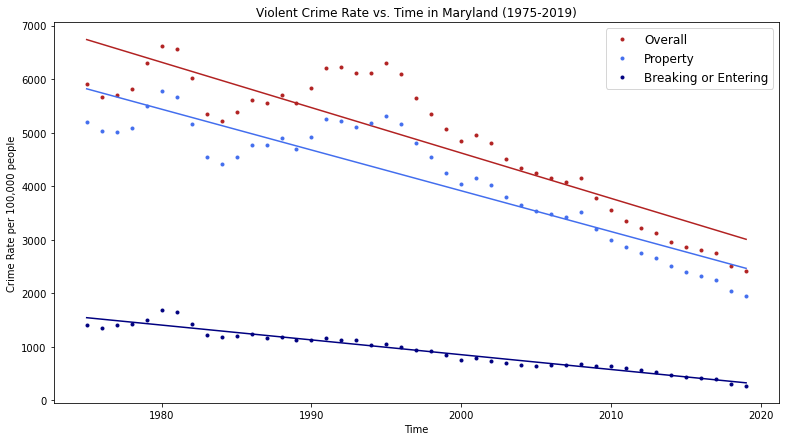

                             OLS Regression Results                            
Dep. Variable:     rate_MD_df['B_&_E']   R-squared:                       0.831
Model:                             OLS   Adj. R-squared:                  0.827
Method:                  Least Squares   F-statistic:                     210.7
Date:                 Fri, 17 Dec 2021   Prob (F-statistic):           3.53e-18
Time:                         22:49:37   Log-Likelihood:                -289.92
No. Observations:                   45   AIC:                             583.8
Df Residuals:                       43   BIC:                             587.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -388.9871     94.248     -4.12

In [131]:
plt.figure(figsize=(13, 7))
plt.title('Violent Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Overall, '.', label='Overall', lw=2, c='#B22222')
regfit_all = reg.fit(rx, ry_all)
plt.plot(rx, regfit_all.predict(rx), c='#B22222')

plt.plot(rate_MD_df.Year, rate_MD_df.Property, '.', label='Property', lw=2, c='#436EEE')
regfit_pro = reg.fit(rx, ry_pro)
plt.plot(rx, regfit_pro.predict(rx), c='#436EEE')

ry_bne = [[y] for y in rate_MD_df['B_&_E'].values]
plt.plot(rate_MD_df.Year, rate_MD_df['B_&_E'], '.', label='Breaking or Entering', lw=2, c='#000080')
regfit_bne = reg.fit(rx, ry_bne)
plt.plot(rx, regfit_mur.predict(rx), c='#000080')

plt.legend(fontsize='large')
plt.show()

print(ols(formula="rate_MD_df['B_&_E'] ~ Overall", data=rate_MD_df).fit().summary())

As we can see the linear regression chart above, Breaking or Entering rate is a main part of property crime rate, and it is also a main part of overall crime rate. In the OLS regression result, the r-squared is very high, which means that the 'Breaking or Entering' rate as a dependent variable has high relationship with independent variable 'Overall'. In this situation, the relationship between both variable is positive.

### Larceny Theft Analysis

Comparing Overall crime rate, Property crime rate, and Larceny Theft rate, and do the regression analysis.

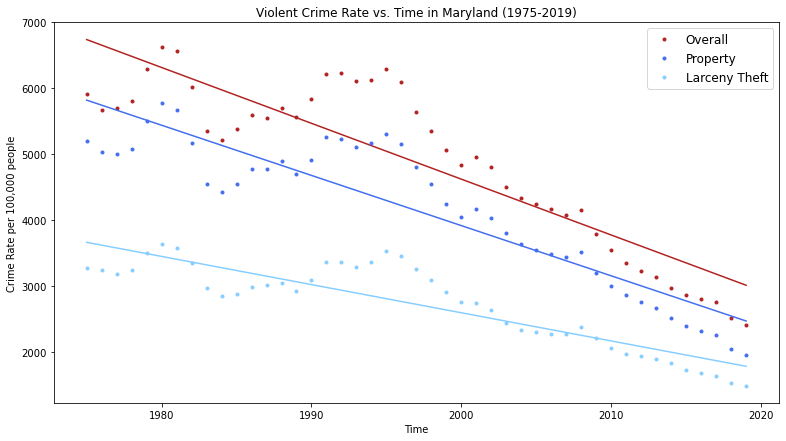

                            OLS Regression Results                            
Dep. Variable:                Larceny   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3202.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           5.18e-42
Time:                        22:49:37   Log-Likelihood:                -256.65
No. Observations:                  45   AIC:                             517.3
Df Residuals:                      43   BIC:                             520.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.5710     45.004      5.590      0.0

In [132]:
plt.figure(figsize=(13, 7))
plt.title('Violent Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Overall, '.', label='Overall', lw=2, c='#B22222')
regfit_all = reg.fit(rx, ry_all)
plt.plot(rx, regfit_all.predict(rx), c='#B22222')

plt.plot(rate_MD_df.Year, rate_MD_df.Property, '.', label='Property', lw=2, c='#436EEE')
regfit_pro = reg.fit(rx, ry_pro)
plt.plot(rx, regfit_pro.predict(rx), c='#436EEE')

ry_lar = [[y] for y in rate_MD_df["Larceny"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.Larceny, '.', label='Larceny Theft', lw=2, c='#87CEFF')
regfit_lar = reg.fit(rx, ry_lar)
plt.plot(rx, regfit_lar.predict(rx), c='#87CEFF')

plt.legend(fontsize='large')
plt.show()

print(ols(formula="Larceny ~ Overall", data=rate_MD_df).fit().summary())

As we can see the linear regression chart above, Larceny Theft rate is a main part of property crime rate, and it is also a main part of overall crime rate. It affects most in the crime rate, and it is also a highest crime happenning. There is another point is that with the higher crime rate of one category, the slope of that regression line is much closer to the slope of overall regression line. In the OLS regression result, the r-squared is very high, which means that the 'Larceny Theft' rate as a dependent variable has highest relationship with independent variable 'Overall'. In this situation, the relationship between both variable is positive.

### Motor Vehicle Theft Analysis

Comparing Overall crime rate, Property crime rate, and Motor Vehicle Theft rate, and do the regression analysis.

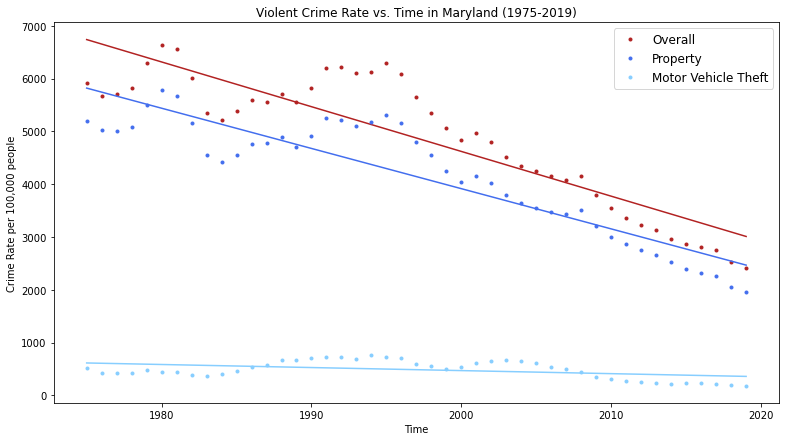

                            OLS Regression Results                            
Dep. Variable:               MV_Theft   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.50
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.85e-08
Time:                        22:49:38   Log-Likelihood:                -278.56
No. Observations:                  45   AIC:                             561.1
Df Residuals:                      43   BIC:                             564.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2355     73.225     -0.044      0.9

In [133]:
plt.figure(figsize=(13, 7))
plt.title('Violent Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Overall, '.', label='Overall', lw=2, c='#B22222')
regfit_all = reg.fit(rx, ry_all)
plt.plot(rx, regfit_all.predict(rx), c='#B22222')

plt.plot(rate_MD_df.Year, rate_MD_df.Property, '.', label='Property', lw=2, c='#436EEE')
regfit_pro = reg.fit(rx, ry_pro)
plt.plot(rx, regfit_pro.predict(rx), c='#436EEE')

ry_mvt = [[y] for y in rate_MD_df["MV_Theft"].values]
plt.plot(rate_MD_df.Year, rate_MD_df.MV_Theft, '.', label='Motor Vehicle Theft', lw=2, c='#87CEFF')
regfit_mvt = reg.fit(rx, ry_mvt)
plt.plot(rx, regfit_mvt.predict(rx), c='#87CEFF')

plt.legend(fontsize='large')
plt.show()

print(ols(formula="MV_Theft ~ Overall", data=rate_MD_df).fit().summary())

After analysis of Breaking or Entering rate and Larceny Theft rate, the Motor Vehicle Theft rate is much lower. The character of MV Theft is similar to the Aggravated Assault rate from Violent crime. This factor stands vary low percentage in overall crime rate and the relationship between MV theft and Overall rate is not very close. In the OLS regression result, we can see the R-squared is only 0.525, which means that the dependent variable 'MV_Theft' rate is kind of not following the 'Overall crime rate'. It will not increase too much while Overall rate increase, even it will decrease.

## 3.4 Crime Distribution in Every County

Presenting the Overall crime rate across counties in Maryland. In this session we will not break down the various crime categories and analyze each one individually. Because in our opinion, we have already done an in-depth analysis of the different crime categories in the previous section. For the state as a whole, the analysis by crime category is necessary. However, for different counties, because of the very good circulation between regions and the relatively small size of the regions, analyzing the overall crime rate helps us to compare the differences in crime rates between counties. If we analyze crime categories in depth, it becomes cumbersome and complicated to compare the differences between counties.

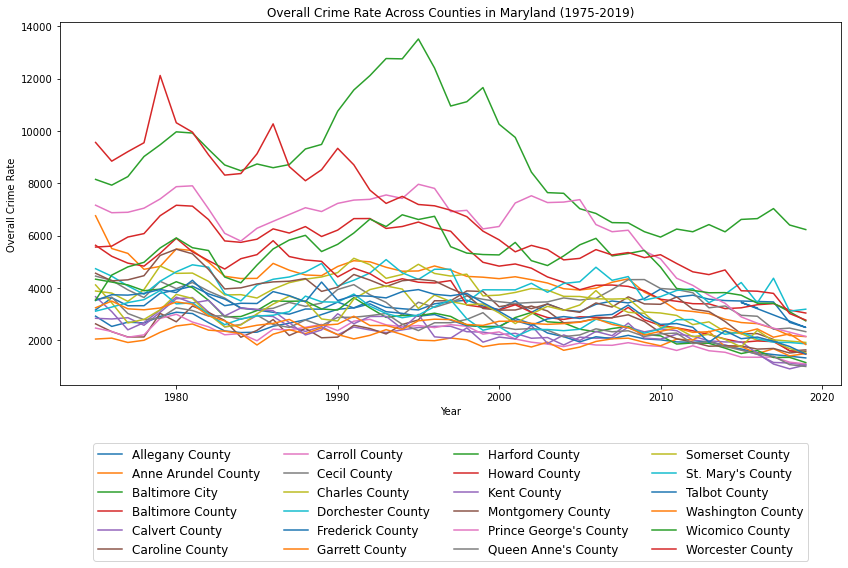

In [134]:
group_counties = rate_County_df.groupby(['Jurisdiction'])

fig = plt.figure(figsize=(14, 8))
for (name, cdf) in group_counties:
   cdfX, cdfY = cdf["Year"].values, cdf["Overall"].values
   plt.plot(cdfX, cdfY, label=name)
plt.xlabel('Year')
plt.ylabel('Overall Crime Rate')
plt.title('Overall Crime Rate Across Counties in Maryland (1975-2019)')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, fontsize='large')
fig.subplots_adjust(bottom=0.25)

plt.show()


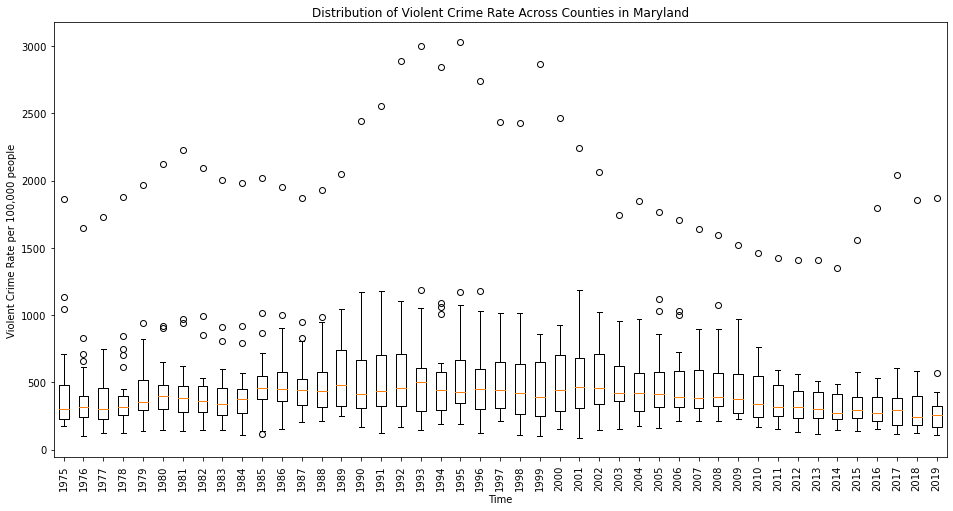

In [135]:
violent_dist = []
for yr in range(1975, 2020):
   arr1d = []
   for i in rate_County_df.index:
      if (rate_County_df['Year'].values[i] == yr):
         arr1d.append(rate_County_df['Violent'].values[i])
   violent_dist.append(arr1d)

plt.figure(figsize=(16, 8))
plt.title('Distribution of Violent Crime Rate Across Counties in Maryland')
plt.xlabel('Time')
plt.ylabel('Violent Crime Rate per 100,000 people')
plt.boxplot(violent_dist, labels=np.arange(1975, 2020, 1))
plt.xticks(rotation='vertical')
plt.show()

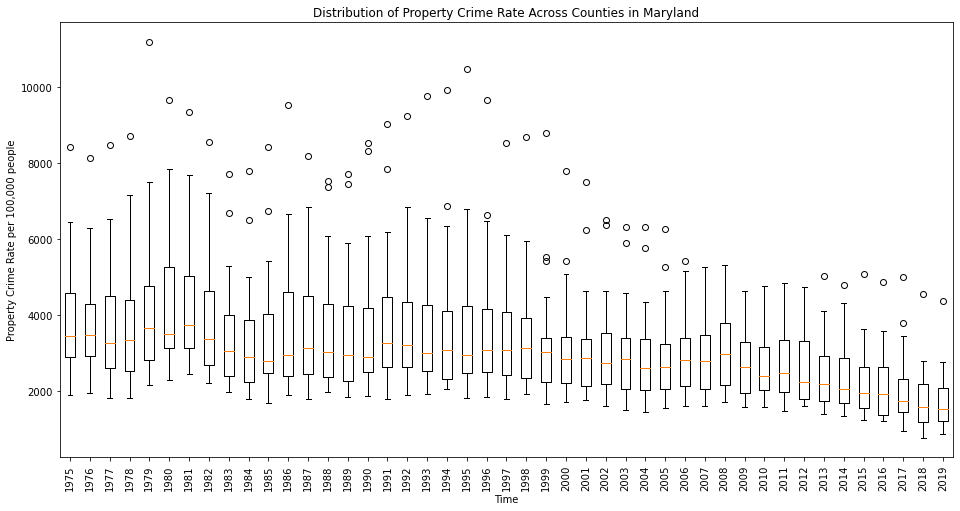

In [136]:
property_dist = []
for yr in range(1975, 2020):
   arr1d = []
   for i in rate_County_df.index:
      if (rate_County_df['Year'].values[i] == yr):
         arr1d.append(rate_County_df['Property'].values[i])
   property_dist.append(arr1d)

plt.figure(figsize=(16, 8))
plt.title('Distribution of Property Crime Rate Across Counties in Maryland')
plt.xlabel('Time')
plt.ylabel('Property Crime Rate per 100,000 people')
plt.boxplot(property_dist, labels=np.arange(1975, 2020, 1))
plt.xticks(rotation='vertical')
plt.show()